## Instructions

This Jupyter notebook file includes the questions, the empty code chunk sections for your code, and the text blocks for your responses.  Answer the questions below by completing this Jupyter notebook file. You will submit a *html file* using this file. You may make slight adjustments to get the file to knit/convert but otherwise keep the formatting the same. Once you've finished answering the questions, submit your responses in a single knitted/converted HTML file only.

There are 17 questions divided among 6 sections. The number of points for each question is provided. Partial credit may be given if your code is correct but your conclusion is incorrect or vice versa.

*Next Steps:*

1. Save the .ipynb file in your R working directory - the same directory where you will download the "winequality-white.csv" data file into. Having both files in the same directory will help in reading the "winequality-white.csv" file. 

2. Read the question and create the R code necessary within the code chunk section immediately below each question. Knitting this file will generate the output and insert it into the section below the code chunk. 

3. Type your answer to the questions in the text block provided immediately after the response prompt. 

4. Once you've finished answering all questions, knit this file and submit the knitted file *as html* on Canvas. 

* Make sure to start submission of the exam at least 10 minutes before the end of the exam time. It is your responsibility to keep track of your time and submit before the time limit. 
* If you are unable to knit your file as HTML for whatever reason, you may upload your Rmd/ipynb/PDF/Word file instead.Incidents will be dealt with on a case-by-case basis. However, if you fail to submit the knitted file because you didn't leave enough time (>=10 minutes) to knit and submit your file, you will be penalized 10%.
* If you are unable to upload your exam file for whatever reason, you may IMMEDIATELY attach the file to the exam page as a comment via Grades-> Final Exam Open Book Section (R) - Part 2 -> Comment box. 
* Note that you will be penalized 10% (or more) if the submission is made within 5 minutes after the exam time has expired and a higher penalty if more than 5 minutes. Furthermore, you will receive zero points if the submission is made after 15 minutes of the exam time expiring. We will not allow later submissions or re-taking of the exam.
* If you upload your file after the exam closes, let the instructors know via a private Piazza post. Please DON'T attach the exam file via a private Piazza post to the instructors since you could compromise the exam process. Any submission received via Piazza will not be considered.

### Mock Example Question 5 - 4pts

This will be the exam question - each question is already copied from Canvas and inserted into individual text blocks below, *you do not need to copy/paste the questions from the online Canvas exam.*

In [ ]:
# Example code chunk area. Enter your code below the comment`

**Mock Response to Question 5**:  This is the section where you type your written answers to the question. Depending on the question asked, your typed response may be a number, a list of variables, a few sentences, or a combination of these elements. 

**Ready? Let's begin. We wish you the best of luck!**

## Final Exam Part 2 - Data Set Background 

For this exam, you will be building a model to predict whether a white wine has good quality or poor quality based on other information. 

The winequality-white.csv dataset consists of the following 12 variables:

1.  fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2.  volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3.  citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4.  residual sugar:  the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5.  chlorides: the amount of salt in the wine

6.  free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7.  total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8.  density:  the density of water is close to that of water depending on the percent alcohol and sugar content

9.  pH: the density of water is close to that of water depending on the percent alcohol and sugar content

10. sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant

11. alcohol: the percent alcohol content of the wine

12.  quality:  0 if the wine has bad quality, 1 if the wine has good quality

Read the data and answer the questions below. Assume a significance level of 0.05 for hypothesis tests unless stated otherwise.

## Read Data


In [2]:
# Load relevant libraries (add here if needed)
library(car)
library(bestglm)
library(glmnet)
library(caret)
library(corrplot)
library(kknn)

# Ensure that the sampling type is correct
RNGkind(sample.kind="Rejection")

# Set seed 
set.seed(19990308)

# Read the data
dataFull = read.csv("winequality-white.csv", header=TRUE)

# Split data for training and testing
testRows = sample(nrow(dataFull), 0.2 * nrow(dataFull))
dataTest = dataFull[testRows, ]
dataTrain = dataFull[-testRows, ]

Loading required package: carData

Loading required package: leaps

Loading required package: Matrix

Loaded glmnet 4.0-2

Loading required package: lattice

Loading required package: ggplot2

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

corrplot 0.92 loaded


Attaching package: ‘kknn’


The following object is masked from ‘package:caret’:

    contr.dummy




**Note:** Use *dataTrain* as your dataset for the following questions unless otherwise stated.

**Note:** Treat all variables as quantitative variables. Don't change the data types of the variables.

## Question 1: Full Model

(1a) Create a correlation matrix plot that includes all twelve variables in the dataset.

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.00000000,-0.01166330,0.290480809,0.08912114,0.02043760,-0.0540942861,0.081407927,0.26278091,-0.4334823662,-0.026826085,-0.118617500,-0.0888354152
volatile.acidity,-0.01166330,1.00000000,-0.145862756,0.06753642,0.06630864,-0.0963646635,0.091508999,0.03376102,-0.0359440687,-0.023324870,0.067904156,-0.2251907176
citric.acid,0.29048081,-0.14586276,1.000000000,0.09379233,0.12374208,0.0882845696,0.115845583,0.15160985,-0.1685753223,0.050926829,-0.078880227,-0.0062941748
residual.sugar,0.08912114,0.06753642,0.093792333,1.00000000,0.07991380,0.2935660837,0.391973604,0.83944900,-0.2023203312,-0.036229736,-0.443707961,-0.0974771365
chlorides,0.02043760,0.06630864,0.123742076,0.07991380,1.00000000,0.0973954777,0.191964092,0.25117921,-0.0939761968,0.015529810,-0.360980223,-0.1797268627
free.sulfur.dioxide,-0.05409429,-0.09636466,0.088284570,0.29356608,0.09739548,1.0000000000,0.611653922,0.28494675,0.0006848548,0.047892174,-0.240084212,0.0009652396
total.sulfur.dioxide,0.08140793,0.09150900,0.115845583,0.39197360,0.19196409,0.6116539217,1.000000000,0.52062783,0.0088335037,0.126135232,-0.440391885,-0.1653632644
density,0.26278091,0.03376102,0.151609852,0.83944900,0.25117921,0.2849467506,0.520627826,1.00000000,-0.1003311416,0.061374822,-0.772750668,-0.2686676450
pH,-0.43348237,-0.03594407,-0.168575322,-0.20232033,-0.09397620,0.0006848548,0.008833504,-0.10033114,1.0000000000,0.155754235,0.121801899,0.0822606435
sulphates,-0.02682609,-0.02332487,0.050926829,-0.03622974,0.01552981,0.0478921738,0.126135232,0.06137482,0.1557542354,1.000000000,-0.006020031,0.0595965454


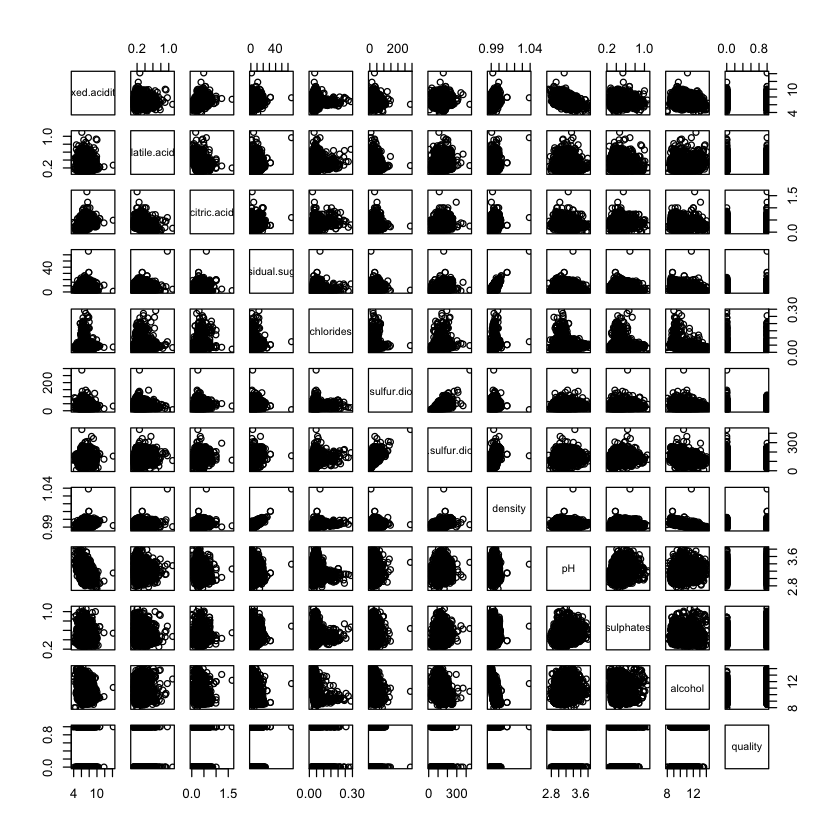

In [3]:
# Code for plotting correlation matrix
cor(dataTrain)
plot(dataTrain)

(1b) Based on the plot above in 1a, identify which two predicting variables have the strongest negative correlation.

**Response to question (1b)**

From the plot above it appears that density and alcohol have the strongest negative correlation. That is, as alcohol increases, density decreases.


(1c) Fit a logistic regression model (use logit link function) with *quality* as the response variable and all other variables as predicting variables. *Do not include an intercept!* Call it **model0**. Display the summary table for the model. *Note: Remember to use dataTrain as your data set.*

In [7]:
# Code to fit model and display summary
model0 <- glm(quality~.-1, data=dataTrain, family=binomial)
summary(model0)


Call:
glm(formula = quality ~ . - 1, family = binomial, data = dataTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1295  -0.9118   0.4466   0.8101   2.5389  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
fixed.acidity        -0.148685   0.052533  -2.830 0.004650 ** 
volatile.acidity     -6.631114   0.456734 -14.519  < 2e-16 ***
citric.acid          -0.033470   0.337702  -0.099 0.921049    
residual.sugar        0.068423   0.009054   7.557 4.12e-14 ***
chlorides             0.268262   1.795775   0.149 0.881250    
free.sulfur.dioxide   0.010332   0.003033   3.407 0.000658 ***
total.sulfur.dioxide -0.001592   0.001298  -1.226 0.220196    
density              -8.945707   1.266621  -7.063 1.63e-12 ***
pH                    0.117322   0.301420   0.389 0.697105    
sulphates             1.572317   0.379971   4.138 3.50e-05 ***
alcohol               1.038061   0.048936  21.213  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0

(1d) Fit a logistic regression model (use logit link function) with *quality* as the response variable and all other variables as predicting variables.*Do include an intercept!* Call it **model1**. Display the summary table for the model. *Note: Remember to use dataTrain as your data set.*

In [8]:
# Code to fit model and display summary
model1 <- glm(quality~., family=binomial, data=dataTrain)
summary(model1)



Call:
glm(formula = quality ~ ., family = binomial, data = dataTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1376  -0.9056   0.4458   0.8111   2.5308  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.685e+02  7.209e+01   2.337  0.01946 *  
fixed.acidity        -2.056e-02  7.581e-02  -0.271  0.78623    
volatile.acidity     -6.504e+00  4.586e-01 -14.182  < 2e-16 ***
citric.acid           3.667e-02  3.389e-01   0.108  0.91383    
residual.sugar        1.327e-01  2.817e-02   4.711 2.47e-06 ***
chlorides             1.074e+00  1.816e+00   0.591  0.55437    
free.sulfur.dioxide   9.113e-03  3.061e-03   2.977  0.00291 ** 
total.sulfur.dioxide -9.374e-04  1.332e-03  -0.704  0.48162    
density              -1.799e+02  7.311e+01  -2.460  0.01388 *  
pH                    7.178e-01  3.908e-01   1.837  0.06624 .  
sulphates             1.818e+00  3.937e-01   4.617 3.89e-06 ***
alcohol               8.474e-01 

(1e) Which coefficients are **not** statistically significant at the 95% confidence level in **model1**? Briefly explain your reasoning.

**Response to question (1e)**

fixed.acidity, citric.acid, chlorides, total.sulfur.dioxide, and pH are not statistically signifcant at the 95% confidence interval. This is because the p-value of the coefficient is > 0.05 for these predictors.

(1f) Interpret the estimated *sulphates* coefficient in the context of this model in terms of *log-odds* in **model1**.

**Response to question (1f)**

A 1 unit increase of sulphates increases the log-odds of the quality by 1.818, keep all other variables constant.

## Question 2: Overall regression and Overdispersion Detection

(2a) Perform a deviance test for the overall regression of **model1**. What do you conclude using a significance level of 0.05? Include your reasoning.

In [10]:
# Code for performing test 
1-pchisq(model1$deviance, model1$df.residual)


[1] 0.1835514

**Response to question (2a)**

**Interpretation:**

The p-value is greater than 0.05 suggesting we fail to reject the null hypothesis that the model is a good fit.

(2b) Estimate the dispersion parameter for **model1**. Does overdispersion seem to be a problem in this model? Explain.

In [11]:
# Code for overdispersion calculation
model1$deviance/model1$df.res

[1] 1.020372

**Response to question (2b)**

The dispersion parameter is less than 2 suggesting that overdispersion does **not** seem to be a problem in this model.

## Question 3: Variable Selection

(3a) Conduct a complete/exhaustive search to find the logistic submodel with the smallest **BIC**. Fit this model. Include an intercept. Call it **model2**. Display the summary table for the model.*Note: Remember to use dataTrain as your data set.*

In [14]:
# Code to conduct a complete search
bestBIC <- bestglm(dataTrain, IC="BIC", family=binomial)
bestBIC

Morgan-Tatar search since family is non-gaussian.



BIC
BICq equivalent for q in (0.134860394055307, 0.589585441306948)
Best Model:
                         Estimate   Std. Error    z value     Pr(>|z|)
(Intercept)          1.542080e+02 45.633170428   3.379295 7.267186e-04
volatile.acidity    -6.585460e+00  0.439939115 -14.969025 1.170237e-50
residual.sugar       1.207390e-01  0.018321828   6.589897 4.401306e-11
free.sulfur.dioxide  8.558244e-03  0.002444092   3.501605 4.624655e-04
density             -1.636636e+02 45.491102976  -3.597705 3.210369e-04
sulphates            1.886662e+00  0.384938398   4.901205 9.525056e-07
alcohol              8.747521e-01  0.070261998  12.449861 1.400893e-35

(3a.1) Show the summary of **model2**. 

In [16]:
# Code to show summary of model
model2 <- glm(quality~volatile.acidity+residual.sugar+free.sulfur.dioxide+density+sulphates+alcohol,family=binomial, data=dataTrain)
summary(model2)


Call:
glm(formula = quality ~ volatile.acidity + residual.sugar + free.sulfur.dioxide + 
    density + sulphates + alcohol, family = binomial, data = dataTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0843  -0.9200   0.4449   0.8190   2.4941  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          1.542e+02  4.563e+01   3.379 0.000727 ***
volatile.acidity    -6.585e+00  4.399e-01 -14.969  < 2e-16 ***
residual.sugar       1.207e-01  1.832e-02   6.590 4.40e-11 ***
free.sulfur.dioxide  8.558e-03  2.444e-03   3.502 0.000462 ***
density             -1.637e+02  4.549e+01  -3.598 0.000321 ***
sulphates            1.887e+00  3.849e-01   4.901 9.53e-07 ***
alcohol              8.748e-01  7.026e-02  12.450  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5030.4  on 3918  degrees of freedom
Residual deviance: 3995.

(3a.2) Provide a plot of the *logLikelihood* for the best model of each size. *Hint: Use the Subsets component of bestglm.* What do you see in this plot?

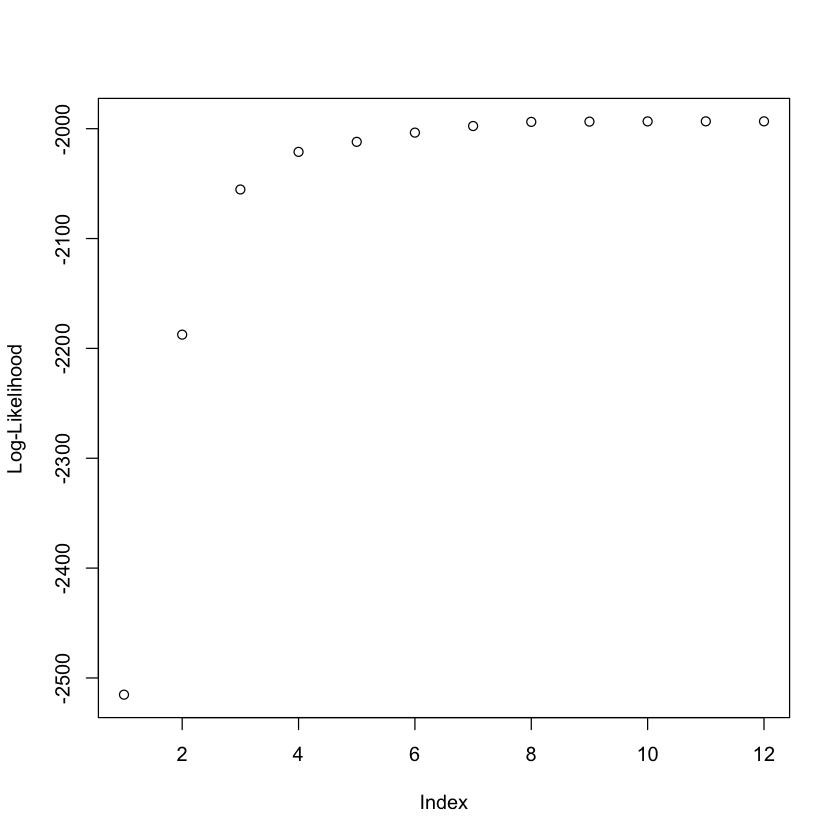

In [28]:
#Code to plot the logLikelihood for the best model of each size
plot(bestBIC$Subsets$logLike, ylab="Log-Likelihood")

**Response to question (3a.2)**
**What do you see in this plot?**

As the number of variables included in the model increases, the log-likelihood eventually reaches a plateau where adding an additional variable does not increase the log-likelihood by a substantial amount. This appears to be when there are 3 or 4 variables included in the model.

(3b) Conduct *forward-backward* stepwise regression using **AIC**. Allow the minimum model to be the model with only an intercept, and the full model to be **model1**. Call it **model3**. Display the summary table for the model. *Note: Remember to use dataTrain as your data set.*

In [33]:
# Place all code needed for (3b) here
minmodel <- glm(quality~1,family=binomial, data=dataTrain)
maxmodel <- model1

model3 <- step(minmodel, scope=list(lower=minmodel, upper=maxmodel), direction="both")
summary(model3)

Start:  AIC=5032.44
quality ~ 1

                       Df Deviance    AIC
+ alcohol               1   4374.9 4378.9
+ density               1   4735.1 4739.1
+ volatile.acidity      1   4833.8 4837.8
+ chlorides             1   4905.0 4909.0
+ total.sulfur.dioxide  1   4923.0 4927.0
+ residual.sugar        1   4993.7 4997.7
+ fixed.acidity         1   4999.7 5003.7
+ pH                    1   5003.6 5007.6
+ sulphates             1   5016.3 5020.3
<none>                      5030.4 5032.4
+ citric.acid           1   5030.3 5034.3
+ free.sulfur.dioxide   1   5030.4 5034.4

Step:  AIC=4378.94
quality ~ alcohol

                       Df Deviance    AIC
+ volatile.acidity      1   4110.7 4116.7
+ free.sulfur.dioxide   1   4326.1 4332.1
+ residual.sugar        1   4327.7 4333.7
+ sulphates             1   4356.7 4362.7
+ density               1   4357.6 4363.6
+ fixed.acidity         1   4362.8 4368.8
+ chlorides             1   4369.5 4375.5
+ pH                    1   4371.7 4377.7
+ ci


Call:
glm(formula = quality ~ alcohol + volatile.acidity + residual.sugar + 
    sulphates + free.sulfur.dioxide + density + pH, family = binomial, 
    data = dataTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0879  -0.9061   0.4474   0.8131   2.5360  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          1.883e+02  4.807e+01   3.917 8.96e-05 ***
alcohol              8.231e-01  7.336e-02  11.221  < 2e-16 ***
volatile.acidity    -6.533e+00  4.402e-01 -14.841  < 2e-16 ***
residual.sugar       1.382e-01  1.959e-02   7.056 1.72e-12 ***
sulphates            1.802e+00  3.855e-01   4.675 2.94e-06 ***
free.sulfur.dioxide  7.990e-03  2.451e-03   3.259  0.00112 ** 
density             -1.999e+02  4.814e+01  -4.153 3.28e-05 ***
pH                   7.655e-01  2.795e-01   2.739  0.00616 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Nu

(3c) Which variables were selected to be in both models (model2 and model3)?

**Response to question (3c)**
**Common variables**

The variables selected by both model2 and model3 are alcohol, volatile.acidity, residual.sugar, sulphates, free.sulfur.dioxide, and density.


## Question 4: Regularized Regression

(4a) Conduct **ridge regression** using the glmnet package. Use *quality* as the binomial response variable, and all other variables in *dataTrain* as the predicting variables. Use *5-fold* cross-validation on the *misclassification error* to select the optimal lambda value. *Note: Ensure to assign the appropriate value for the family, the type.measure, and the nfolds parameters. If needed, you can take a look at the help file by typing ?cv.glmnet.*

In [42]:
# Setting the seed (please do not change)
set.seed(19990308)

# Code to conduct ridge regression, and find optimal lambda
ridge.cv <- cv.glmnet(as.matrix(dataTrain[,-12]), as.matrix(dataTrain[,12]), alpha=0, nfolds=5, type.measure="class", family="binomial")

In [43]:
ridge.cv$lambda.min

[1] 0.01825743

(4a.1) What optimal lambda value did you obtain?

**Response to question (4a.1)**
**Optimal lambda:** 

The optimal lambda is 0.018


(4a.2) Display the estimated coefficients at the optimal lambda value. 

In [45]:
# Setting the seed (please do not change)
set.seed(19990308)

# Display coefficients at optimal lambda

ridge.mod <- glmnet(as.matrix(dataTrain[,-12]), as.matrix(dataTrain[,12]), family="binomial", alpha=0)
coef(ridge.mod, s = ridge.cv$lambda.min)


12 x 1 sparse Matrix of class "dgCMatrix"
                                 1
(Intercept)           84.658444958
fixed.acidity         -0.075244180
volatile.acidity      -5.353004777
citric.acid            0.093750994
residual.sugar         0.075059483
chlorides             -1.842852760
free.sulfur.dioxide    0.009313108
total.sulfur.dioxide  -0.001901096
density              -92.572889946
pH                     0.413200747
sulphates              1.441921154
alcohol                0.730513288

(4a.3) Plot the paths of the Ridge regression coefficients.

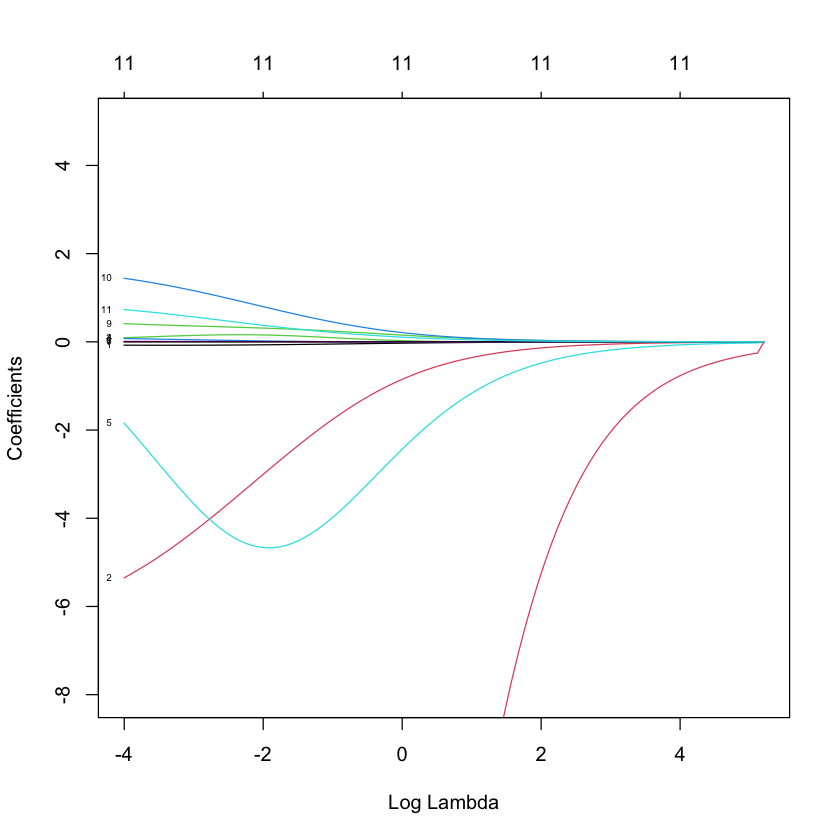

In [55]:
# Setting the seed (please do not change)
set.seed(19990308)

# Plot ridge Plot

plot(ridge.mod, xvar="lambda", label=TRUE, ylim=c(-8, 5))

(4b) Conduct **lasso regression** using the glmnet package. Use *quality* as the *binomial* response variable, and all other variables in *dataTrain* as the predicting variables. Use *5-fold* cross-validation on the *misclassification error* to select the optimal lambda value. *Note: Ensure to assign the appropriate value for the family, the type.measure, and the nfolds parameters. If needed, you can take a look at the help file by typing ?cv.glmnet.*

In [47]:
# Setting the seed (please do not change)
set.seed(19990308)

# Code to conduct lasso regression, and find optimal lambda

lasso.cv <- cv.glmnet(as.matrix(dataTrain[,-12]), as.matrix(dataTrain[,12]), alpha=1, nfolds=5, type.measure="class", family="binomial")
lasso.opt <- lasso.cv$lambda.min
lasso.opt

[1] 0.01120259

(4b.1) What optimal lambda value did you obtain?

**Response to question (4b.1)**
**Optimal lambda:**

The optimal labmda is 0.01 for lasso regression

(4b.2) Plot the paths of the Lasso regression coefficients. Describe the difference between the lasso path and the ridge path from (4a.3).

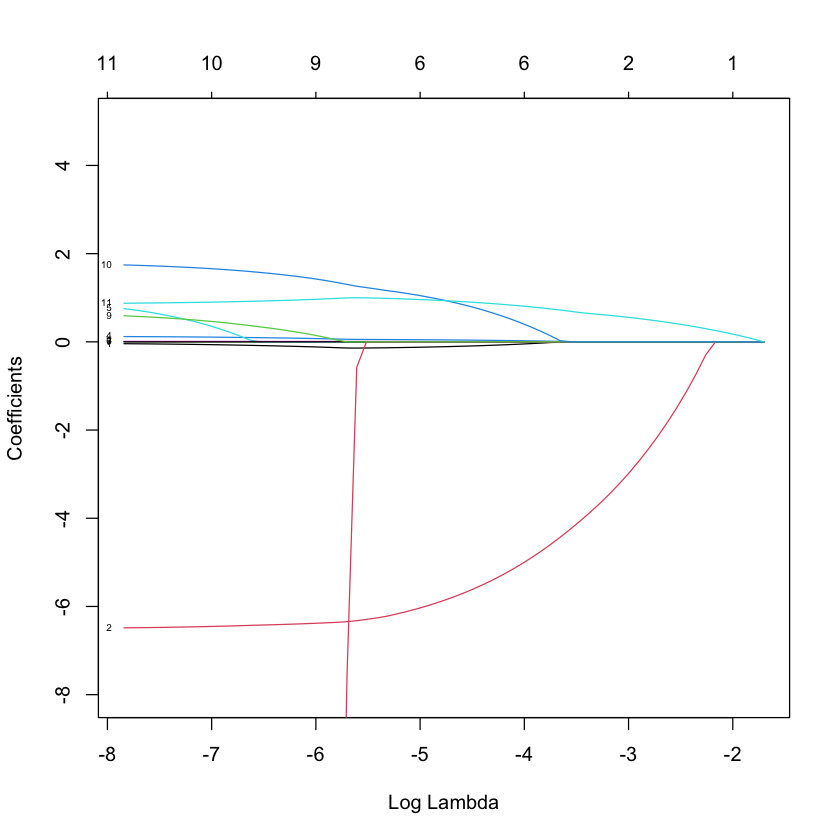

In [54]:
# Setting the seed (please do not change)
set.seed(19990308)

# Plot Lasso Plot
lasso.mod <- glmnet(as.matrix(dataTrain[,-12]), as.matrix(dataTrain[,12]), family="binomial", alpha=1)
plot(lasso.mod, xvar="lambda", label=TRUE, ylim=c(-8, 5))


In [57]:
coef(lasso.mod, s=lasso.opt)

12 x 1 sparse Matrix of class "dgCMatrix"
                                1
(Intercept)          -7.212654930
fixed.acidity        -0.092055493
volatile.acidity     -5.606604593
citric.acid           .          
residual.sugar        0.038582628
chlorides             .          
free.sulfur.dioxide   0.004938873
total.sulfur.dioxide  .          
density               .          
pH                    .          
sulphates             0.784842126
alcohol               0.896986746

**Response to question (4b.1)**
**difference between lasso path and ridge path:** 

The lasso path reduces the certain variables to 0 while the ridge path gradually decreases the coefficient but never forces them to 0. That is, ridge does not perform variable selection.


(4b.3) Fit a logistic regression model with *quality* as the response variable and the *optimal* variables selected from lasso regression as predicting variables. Include an intercept. Call it *model4*. Display the summary table for the model.

In [58]:
# Setting the seed (please do not change)
set.seed(19990308)

# Code for fitting model and display summary
model4 <- glm(quality~fixed.acidity+volatile.acidity+residual.sugar+free.sulfur.dioxide+sulphates+alcohol, data=dataTrain, family="binomial")
summary(model4)


Call:
glm(formula = quality ~ fixed.acidity + volatile.acidity + residual.sugar + 
    free.sulfur.dioxide + sulphates + alcohol, family = "binomial", 
    data = dataTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1165  -0.9147   0.4473   0.8111   2.5727  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -8.674966   0.620541 -13.980  < 2e-16 ***
fixed.acidity       -0.169362   0.045577  -3.716 0.000202 ***
volatile.acidity    -6.758496   0.440423 -15.345  < 2e-16 ***
residual.sugar       0.063258   0.008576   7.376 1.63e-13 ***
free.sulfur.dioxide  0.008168   0.002450   3.334 0.000855 ***
sulphates            1.486606   0.367147   4.049 5.14e-05 ***
alcohol              1.063302   0.044992  23.633  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5030.4  on 3918  degrees of freedom
Residual deviance: 

## Question 5: Prediction and Model Evaluation

(5a) Using **model1**, **model2**, **model3**, and **model4**, assign a value of 0 or 1 to the test rows in dataTest, with 1 indicating the wine does have good quality, and 0 indicating the wine does not have good quality. Use 0.5 as your classification threshold. Use the R function “head()” to show the first few classifications for each model.

In [95]:
# Code to calculate binary classifications.
model1.pred <- as.vector(predict(model1, dataTest, type="response"))
model1.pred <- ifelse(model1.pred > 0.5, 1, 0)

model2.pred <- as.vector(predict(model2, dataTest, type="response"))
model2.pred <- ifelse(model2.pred > 0.5, 1, 0)

model3.pred <- as.vector(predict(model3, dataTest, type="response"))
model3.pred <- ifelse(model3.pred > 0.5, 1, 0)

model4.pred <- as.vector(predict(model4, dataTest, type="response"))
model4.pred <- ifelse(model4.pred > 0.5, 1, 0)

results <- data.frame("model1" = model1.pred, "model2"=model2.pred, "model3"=model3.pred, "model4"=model4.pred)

head(results)


,model1,model2,model3,model4
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,0,0,0,0


(5a.1) How many wines in *dataTest* are predicted as having good quality for these 4 models?

In [96]:
# Code to calculate number of positive predictions for each model
model1.cnt <- sum(model1.pred)
model2.cnt <- sum(model2.pred)
model3.cnt <- sum(model3.pred)
model4.cnt <- sum(model4.pred)

qualitycnt <- data.frame("model1" = model1.cnt, "model2"=model2.cnt, "model3"=model3.cnt, "model4"=model4.cnt)
qualitycnt

model1,model2,model3,model4
<dbl>,<dbl>,<dbl>,<dbl>
743,742,744,740


The counts of the number of good wines is shown in the dataframe above for each of the models.

(5a.2) Use the classification of the test data of each of the four models to calculate the accuracy of the predictions. *Hint: Accuracy is the proportion of predictions that are correct overall.*

In [97]:
# Code to calculate accuracy metrics
model1.con <- confusionMatrix(table(model1.pred, dataTest$quality))
model2.con <- confusionMatrix(table(model2.pred, dataTest$quality))
model3.con <- confusionMatrix(table(model3.pred, dataTest$quality))
model4.con <- confusionMatrix(table(model4.pred, dataTest$quality))
data.frame("model1" = model1.con$overall["Accuracy"], "model2"=model2.con$overall["Accuracy"], "model3"=model3.con$overall["Accuracy"], "model4"=model4.con$overall["Accuracy"])

,model1,model2,model3,model4
,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,0.7640449,0.7630235,0.7671093,0.7609806


(5a.3) Which model has the lowest prediction accuracy?

**Response to question (5a.3)**
**Model with lowest prediction accuracy:**

Model4 had the lowest prediction accuracy at 76.1%


(5b) Instead of choosing 0.5 as the classification threshold value, another method is to find the best threshold value by looking through the training data. Using **model1**, look through threshold values in the range of 0 to 1 with an increment of 0.1, and find the best threshold value which causes the *least classification error*. Plot a graph with the x-axis being the threshold value, and the y-axis being the classification errors. Report the threshold.

*Hint: You can use a loop to go through all the possible values in the range of 0 to 1 as the threshold. In the meanwhile, you need to store all the classification errors in the loop.*

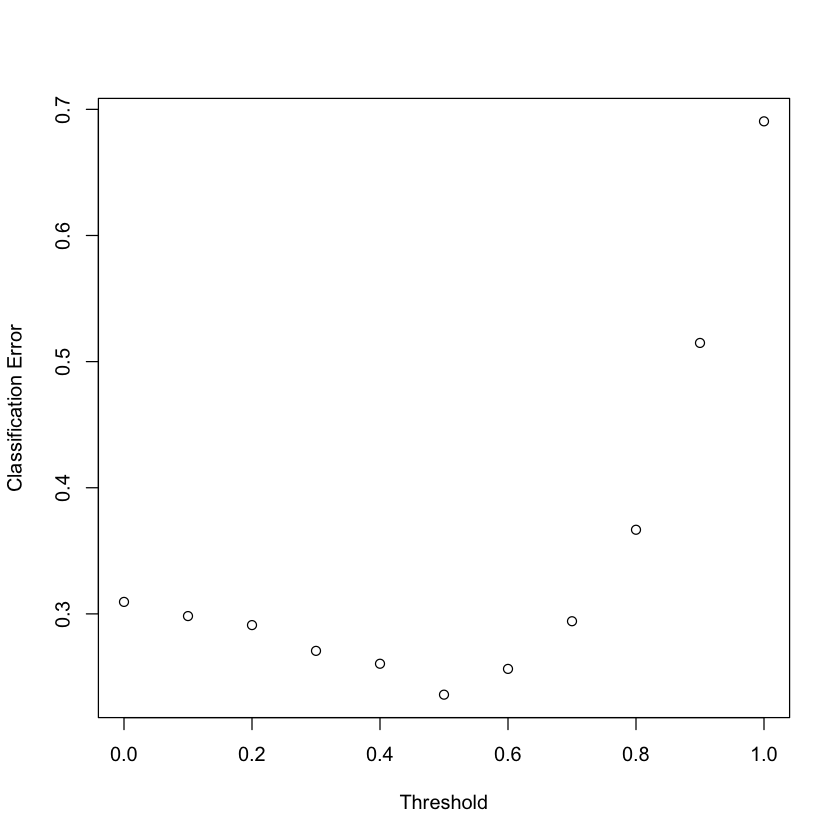

In [138]:
# Setting the seed (please do not change)
set.seed(19990308)

# Code to find the best threshold and create plot
pred <- as.vector(predict(model1, dataTest, type="response"))
res = rbind(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
thres = rbind(0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1)

j = 2
for (i in seq(0.1, 0.9, by=0.1)) {
    tmp <- ifelse(pred > i, 1, 0)
    cm <- confusionMatrix(table(tmp, dataTest$quality))
    res[j] = 1 - cm$overall["Accuracy"]
    j = j+1
}

n <- nrow(dataTest)
n0 <- n - sum(dataTest$quality)
res[1]  = n0 / n
res[11] = sum(dataTest$quality) / n

plot(x=thres, y=res, xlab="Threshold", ylab="Classification Error")

**Response to question (5b)**
**Threshold value**
The threshold with the lowest classification error is 0.5.

## Question 6: Decision Trees, Random Forest and KNN

(6a) Describe the relationship between the random forest and the decision tree algorithms.

**Response to question (6a)**

Strictly using a decision tree will result in large variance. The method to get around this is to use the random forest which is an average numerious decision trees.


(6b) Using train.kknn(), fit a KNN model to *dataTrain* via leave-one-crossvalidation. Ensure to scale the predicting variables, use 15 as the maximum number for k and use triangular, rectangular, epanechnikov, and gaussian kernels. Report the optimal parameter values for *k* and *kernel*. *Note: Ensure to assign the appropriate value for the scale, the kmax, and the kernel parameters. If needed, you can take a look at the help file by typing "?train.kknn."*

In [137]:
# Code to fit KNN

kknn <- train.kknn(quality~., kmax=15, kernel=c("triangular", "rectangular", "epanechnikov", "gaussian"), scale=TRUE, data=dataTrain)
kknn$best.parameters

$kernel
[1] "triangular"

$k
[1] 15

**Response to question (6b)**

**K:** 15

**kernel:** triangular



**This is the End of Final Exam Part 2**

*We hope you enjoyed the course - and we wish you the best in your future coursework!*

